In [1]:
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

From below, columns with NaN values are: Age, Cabin, and Embarked

In [3]:
train_data = pd.read_csv('train.csv')
# train_data.head()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
print(train_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Columns with NaN values in the test set: Age, Fare, and Cabin

In [5]:
test_data = pd.read_csv('test.csv')
test_data.head()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Embarked, Pclass and Sex are investigated in this notebook

The following code is adapted from: https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

C:\Users\thanm\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


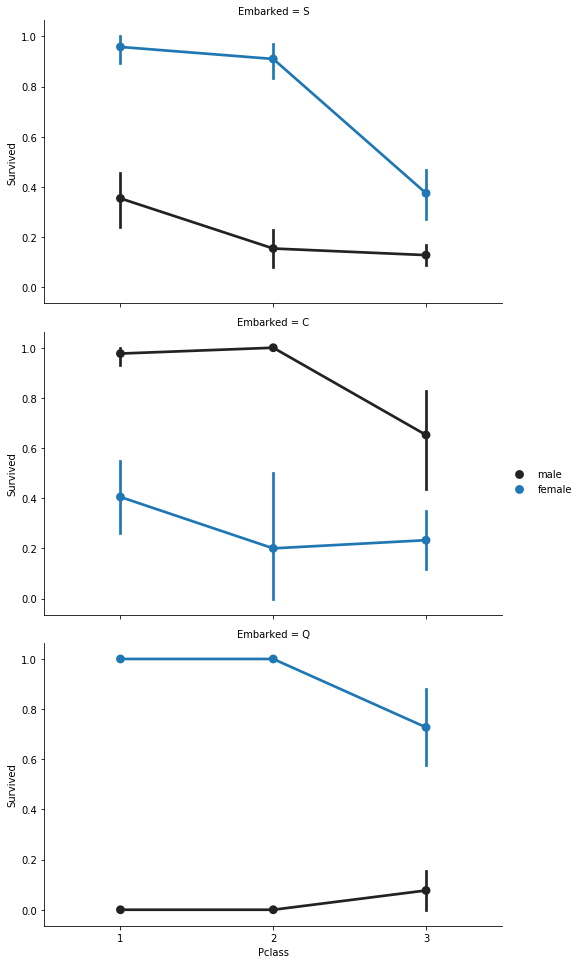

In [6]:
facetGrid = sns.FacetGrid(train_data, row = 'Embarked', size = 4.5, aspect = 1.6)
facetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = None, order = None, hue_order = None)
facetGrid.add_legend()

Another view of the same data:

In [7]:
train_data[['Pclass','Survived']].groupby(['Pclass'], as_index = False).count()
#This is the total count in each class

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [8]:
train_data[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean()
#This is the average number that survived in each class

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_data[['Sex','Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_data[['Embarked','Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Dealing with missing data in 'Embarked'. None of the other three columns have NaN values

As an initial assessment, I will just fill the NaN values with the most common Embarked type, which is 'S'

In [11]:
print(train_data['Embarked'].describe())
print('____________________________________________')
print(test_data['Embarked'].describe())

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object
____________________________________________
count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object


Replace in both train and test sets

In [12]:
replace_val = 'S'
data_tot = [train_data, test_data]
for dataset in data_tot:
    dataset['Embarked'] = dataset['Embarked'].fillna(replace_val)
    
print(train_data['Embarked'].describe())
print('____________________________________________')
print(test_data['Embarked'].describe())
# print(train_data['Embarked'])

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object
____________________________________________
count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object


Convert 'Embarked' and 'Sex' into numeric value so that we can use it in analysis

In [13]:
ports = {"S": 0, 'C':1, 'Q':2}
num_sex = {"male":0,"female":1}
data_tot = [train_data, test_data]
for dataset in data_tot:
    dataset['Sex'] = dataset['Sex'].map(num_sex)
    dataset['Embarked'] = dataset['Embarked'].map(ports)

# train_data['Embarked']

In [14]:
# data = train_data.loc[:,train_data.columns.all(['Embarked','Sex','Pclass'])]
data = train_data.loc[:,train_data.columns == 'Embarked'].copy()
target = train_data.loc[:,train_data.columns == 'Survived'].copy().to_numpy().ravel()
feature_train, feature_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)
print(feature_train.shape)
print(feature_test.shape)
print(target_train.shape)
print(target_test.shape)

(712, 1)
(179, 1)
(712,)
(179,)


Split the training data into training and validation to see an initial accuracy 

In [15]:
# # data = train_data.loc[:,train_data.columns.all(['Embarked','Sex','Pclass'])]
# data = train_data.loc[:,train_data.columns == 'Embarked'].copy()
# target = train_data.loc[:,train_data.columns == 'Survived'].copy()
# feature_train, feature_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)
# print(feature_train.shape)
# print(feature_test.shape)
# print(target_train.shape)
# print(target_test.shape)

### Embarked

1) Decision Tree 

In [16]:
clf = tree.DecisionTreeClassifier(min_samples_split = 30).fit(feature_train, target_train)
pred = clf.predict(feature_test)
acc = accuracy_score(target_test, pred)
acc

0.6256983240223464

2) SVM

In [17]:
clf2 = svm.SVC(C=10000, gamma = 1).fit(feature_train, target_train)
pred2 = clf2.predict(feature_test)
acc2 = accuracy_score(target_test, pred2)
acc2

0.6256983240223464

3) KNN

In [18]:
clf3 = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree').fit(feature_train, target_train)
pred3 = clf3.predict(feature_test)
acc3 = accuracy_score(target_test, pred3)
acc3

0.6256983240223464

4) SGD

In [19]:
sgd = SGDClassifier().fit(feature_train, target_train)
pred4 = sgd.predict(feature_test)
acc4 = accuracy_score(target_test, pred4)
acc4

0.5865921787709497

5) random forest

In [20]:
ran = RandomForestClassifier(n_estimators = 100).fit(feature_train, target_train)
pred5 = ran.predict(feature_test)
acc5 = accuracy_score(target_test, pred5)
acc5

0.6256983240223464

In [21]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'SVM', 'KNN', 
              'SGD', 'Random Forest'],
    'Score': [acc, acc2, acc3, 
              acc4, acc5]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Decision Tree,0.625698
1,SVM,0.625698
2,KNN,0.625698
4,Random Forest,0.625698
3,SGD,0.586592


### Sex

In [22]:
# data = train_data.loc[:,train_data.columns.all(['Embarked','Sex','Pclass'])]
data_sex = train_data.loc[:,train_data.columns == 'Sex'].copy()
target_sex = train_data.loc[:,train_data.columns == 'Survived'].copy().to_numpy().ravel()
feature_train_sex, feature_test_sex, target_train_sex, target_test_sex = train_test_split(data_sex, target_sex, test_size=0.2, random_state=42)
print(feature_train.shape)
print(feature_test.shape)
print(target_train.shape)
print(target_test.shape)

(712, 1)
(179, 1)
(712,)
(179,)


In [23]:
clf_sex = tree.DecisionTreeClassifier(min_samples_split = 2).fit(feature_train_sex, target_train_sex)
pred_sex = clf_sex.predict(feature_test_sex)
acc_sex = accuracy_score(target_test_sex, pred_sex)
acc_sex

0.7821229050279329

In [24]:
clf_sex_2 = svm.SVC(C=10000, gamma = 1000).fit(feature_train_sex, target_train_sex)
pred_sex_2 = clf_sex_2.predict(feature_test_sex)
acc_sex_2 = accuracy_score(target_test_sex, pred_sex_2)
acc_sex_2

0.7821229050279329

In [25]:
clf_sex_3 = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree').fit(feature_train_sex, target_train_sex)
pred_sex_3 = clf_sex_3.predict(feature_test_sex)
acc_sex_3 = accuracy_score(target_test_sex, pred_sex_3)
acc_sex_3

0.4134078212290503

In [26]:
sgd_sex = SGDClassifier().fit(feature_train_sex, target_train_sex)
pred_sex_4 = sgd_sex.predict(feature_test_sex)
acc4_sex = accuracy_score(target_test_sex, pred_sex_4)
acc4_sex

0.7821229050279329

In [27]:
ran_sex = RandomForestClassifier(n_estimators = 100).fit(feature_train_sex, target_train_sex)
pred_sex_5 = ran_sex.predict(feature_test_sex)
acc5_sex = accuracy_score(target_test_sex, pred_sex_5)
acc5_sex

0.7821229050279329

In [28]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'SVM', 'KNN', 
              'SGD', 'Random Forest'],
    'Score': [acc_sex, acc_sex_2,  acc_sex_3, 
               acc4_sex,  acc5_sex]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Decision Tree,0.782123
1,SVM,0.782123
3,SGD,0.782123
4,Random Forest,0.782123
2,KNN,0.413408


### Pclass

In [29]:
# data = train_data.loc[:,train_data.columns.all(['Embarked','Sex','Pclass'])]
data_p = train_data.loc[:,train_data.columns == 'Pclass'].copy()
target_p = train_data.loc[:,train_data.columns == 'Survived'].copy().to_numpy().ravel()
feature_train_p, feature_test_p, target_train_p, target_test_p = train_test_split(data_p, target_p, test_size=0.2, random_state=42)
print(feature_train.shape)
print(feature_test.shape)
print(target_train.shape)
print(target_test.shape)

(712, 1)
(179, 1)
(712,)
(179,)


In [30]:
clf_p = tree.DecisionTreeClassifier(min_samples_split = 2).fit(feature_train_p, target_train_p)
pred_p = clf_p.predict(feature_test_p)
acc_p = accuracy_score(target_test_p, pred_p)
acc_p

0.7039106145251397

In [31]:
clf_p_2 = svm.SVC(C=10000, gamma = 1000).fit(feature_train_p, target_train_p)
pred_p_2 = clf_p_2.predict(feature_test_p)
acc_p_2 = accuracy_score(target_test_p, pred_p_2)
acc_p_2

0.7039106145251397

In [32]:
clf_p_3 = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree').fit(feature_train_p, target_train_p)
pred_p_3 = clf_p_3.predict(feature_test_p)
acc_p_3 = accuracy_score(target_test_p, pred_p_3)
acc_p_3

0.5865921787709497

In [33]:
sgd_p = SGDClassifier().fit(feature_train_p, target_train_p)
pred_p_4 = sgd_p.predict(feature_test_p)
acc4_p = accuracy_score(target_test_p, pred_p_4)
acc4_p

0.7039106145251397

In [34]:
ran_p = RandomForestClassifier(n_estimators = 100).fit(feature_train_p, target_train_p)
pred_p_5 = ran_p.predict(feature_test_p)
acc5_p = accuracy_score(target_test_p, pred_p_5)
acc5_p

0.7039106145251397

In [35]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'SVM', 'KNN', 
              'SGD', 'Random Forest'],
    'Score': [acc_p, acc_p_2,  acc_p_3, 
               acc4_p,  acc5_p]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Decision Tree,0.703911
1,SVM,0.703911
3,SGD,0.703911
4,Random Forest,0.703911
2,KNN,0.586592


### Looking at the impact of the above factors together

In [36]:
# data_mf = train_data.loc[:,['Embarked','Sex','Pclass']]
# data_mf

# Trouble getting train test split to work  with multiple features

In [47]:
data_mf = train_data.loc[:,['Embarked','Sex','Pclass']]
# data_p = train_data.loc[:,train_data.columns == 'Pclass'].copy()
target_mf = train_data.loc[:,train_data.columns == 'Survived'].copy().to_numpy().ravel()
# feature_train_mf, feature_test_mf, target_train_mf, target_test_mf = train_test_split(data_mf, target_mf, test_size=0.2, random_state=42)
# print(feature_train.shape)
# print(feature_test.shape)
# print(target_train.shape)
# print(target_test.shape)

In [38]:
clf_mf = tree.DecisionTreeClassifier(min_samples_split = 2).fit(data_mf, target_mf)
pred_mf = clf_mf.predict(data_mf)
acc_mf = accuracy_score(target_mf, pred_mf)
acc_mf

0.8114478114478114

In [39]:
clf_mf_2 = svm.SVC(C=10000, gamma = 1000).fit(data_mf, target_mf)
pred_mf_2 = clf_mf_2.predict(data_mf)
acc_mf_2 = accuracy_score(target_mf, pred_mf_2)
acc_mf_2

0.8114478114478114

In [40]:
clf_mf_3 = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree').fit(data_mf, target_mf)
pred_mf_3 = clf_mf_3.predict(data_mf)
acc_mf_3 = accuracy_score(target_mf, pred_mf_3)
acc_mf_3

0.8024691358024691

In [41]:
sgd_mf = SGDClassifier().fit(data_mf, target_mf)
pred_mf_4 = sgd_mf.predict(data_mf)
acc4_mf = accuracy_score(target_mf, pred_mf_4)
acc4_mf

0.77665544332211

In [42]:
ran_mf = RandomForestClassifier(n_estimators = 100).fit(data_mf, target_mf)
pred_mf_5 = ran_mf.predict(data_mf)
acc5_mf = accuracy_score(target_mf, pred_mf_5)
acc5_mf

0.8114478114478114

In [43]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'SVM', 'KNN', 
              'SGD', 'Random Forest'],
    'Score': [acc_mf, acc_mf_2,  acc_mf_3, 
               acc4_mf,  acc5_mf]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Decision Tree,0.811448
1,SVM,0.811448
4,Random Forest,0.811448
2,KNN,0.802469
3,SGD,0.776655


source: https://www.kaggle.com/startupsci/titanic-data-science-solutions

Ensemble methods: https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f

https://www.kaggle.com/jatturat/finding-important-factors-to-survive-titanic

### Trying Ensemble methods with the three features together

https://www.kaggle.com/pragyanbo/ensemble-learning-methods-using-titanic-dataset

In [45]:
from sklearn.ensemble import BaggingClassifier

In [55]:
bag_clf = BaggingClassifier(n_estimators=1000,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)
bag_clf.fit(data_mf, target_mf)
pred_bag = bag_clf.predict(data_mf)
acc_bag = accuracy_score(target_mf,pred_bag)
acc_bag

0.8114478114478114

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
xt_clf = ExtraTreesClassifier(random_state=42,n_estimators = 1000)
xt_clf.fit(data_mf, target_mf)
pred_xt = xt_clf.predict(data_mf)
acc_xt = accuracy_score(target_mf,pred_xt)
acc_xt

0.8114478114478114

In [44]:
# submission = pd.DataFrame({
#         "PassengerId": test_df["PassengerId"],
#         "Survived": Y_pred
#     })
# # submission.to_csv('../output/submission.csv', index=False)